In [24]:
# from js import fetch
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [26]:
df.describe

<bound method NDFrame.describe of            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     30

In [27]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


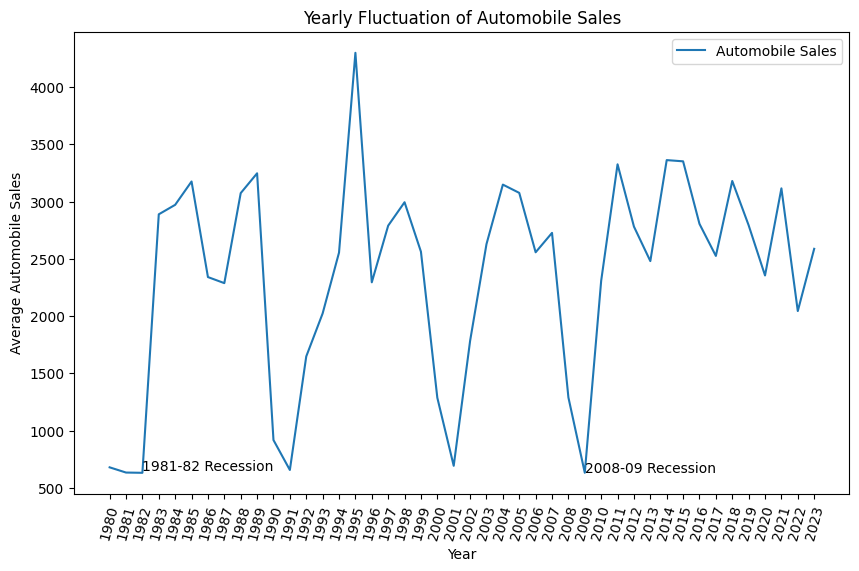

In [28]:
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')

# Set x-ticks and rotate them
plt.xticks(list(range(1980, 2024)), rotation=75)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Yearly Fluctuation of Automobile Sales')

# Add annotations
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, df_line.loc[2009], '2008-09 Recession')  # Adjust y-coordinate as needed

# Show legend
plt.legend(['Automobile Sales'])

# Show the plot
plt.show()

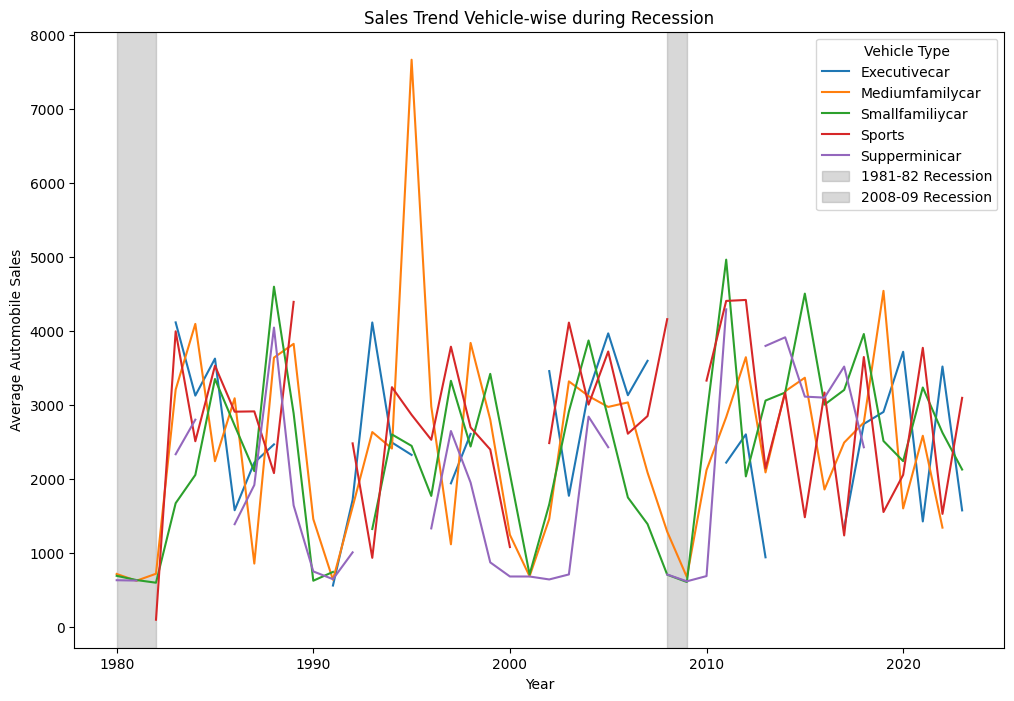

In [30]:
df_Mline = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)

# Pivot the table to have 'Vehicle_Type' as columns
df_pivot = df_Mline.pivot(columns='Vehicle_Type', values='Automobile_Sales')

# Create figure
plt.figure(figsize=(12, 8))

# Plot each vehicle type
df_pivot.plot(kind='line', ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')

# Highlight recession periods
plt.axvspan(1980, 1982, color='gray', alpha=0.3, label='1981-82 Recession')
plt.axvspan(2008, 2009, color='gray', alpha=0.3, label='2008-09 Recession')

# Show legend
plt.legend(title='Vehicle Type')
plt.show()

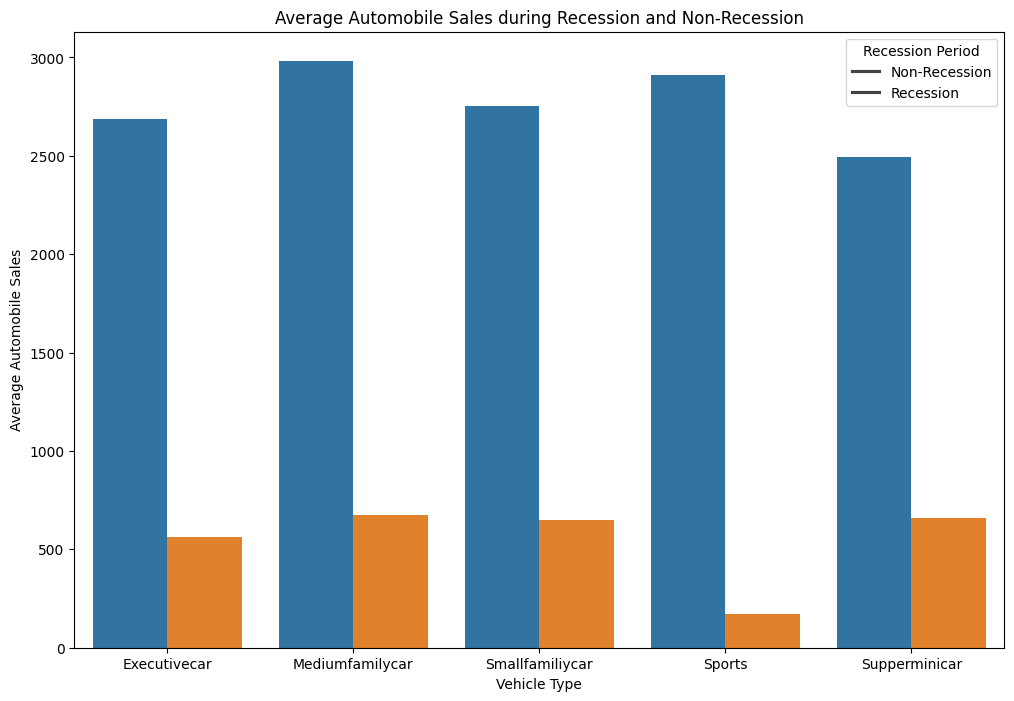

In [31]:
new_df = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=new_df)

# Add labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

# Customizing the legend
plt.legend(title='Recession Period', labels=['Non-Recession', 'Recession'])

# Show the plot
plt.show()

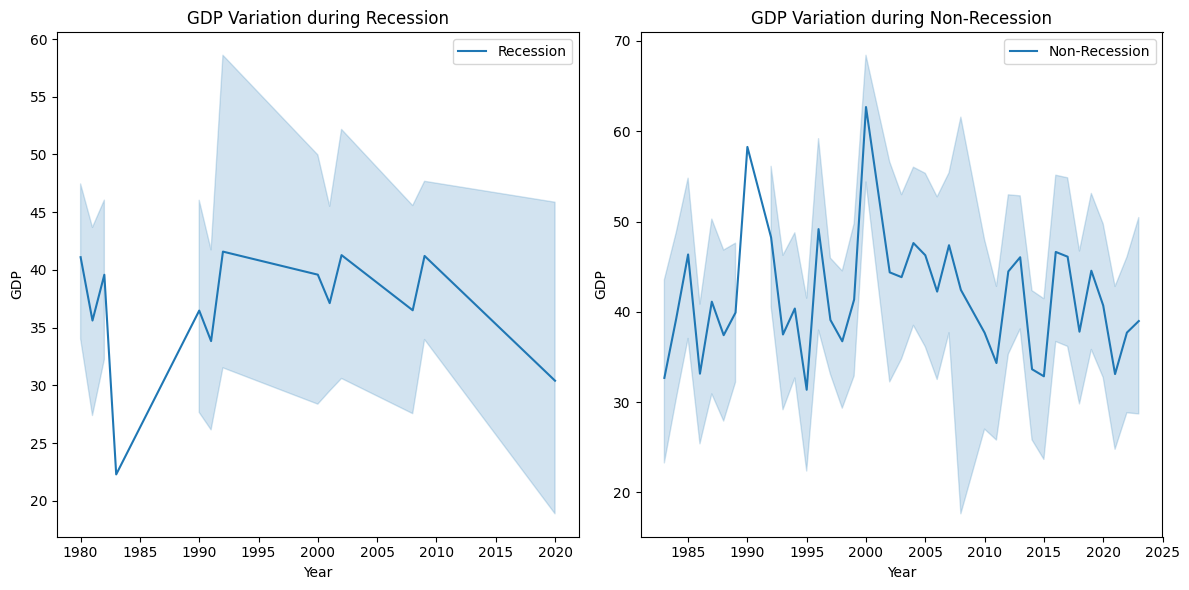

In [32]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplots
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP variation during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Plot GDP variation during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

# Set titles and legends
ax0.set_title('GDP Variation during Recession')
ax1.set_title('GDP Variation during Non-Recession')
ax0.legend()
ax1.legend()

# Show the plot
plt.tight_layout()
plt.show()

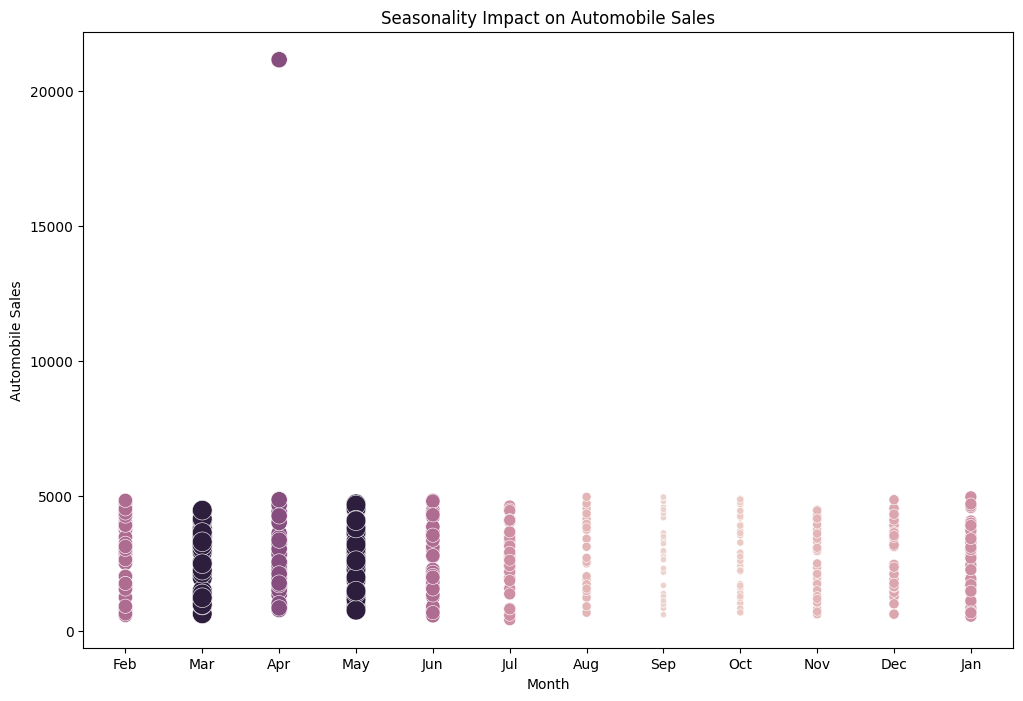

In [33]:
non_rec_data = df[df['Recession'] == 0]

# Size for bubble effect
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False, sizes=(20, 200))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show the plot
plt.show()

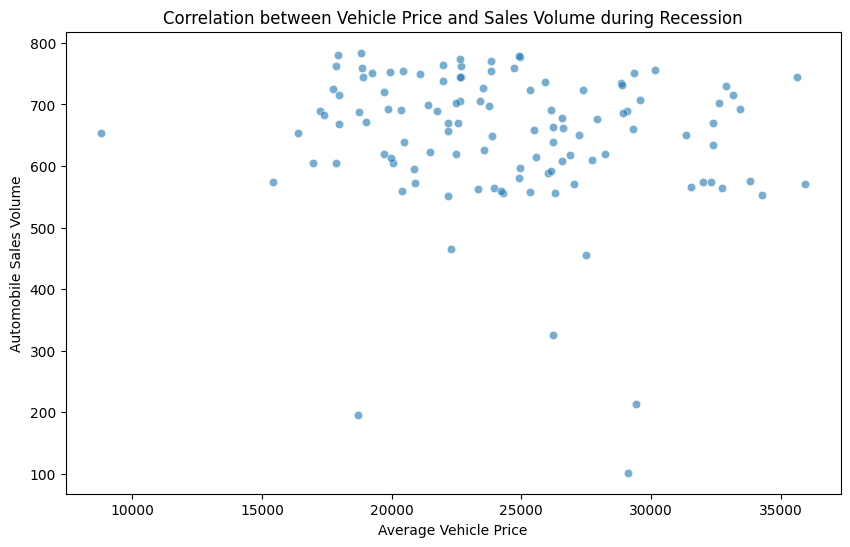

In [35]:
rec_data = df[df['Recession'] == 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.title('Correlation between Vehicle Price and Sales Volume during Recession')

# Show the plot
plt.show()

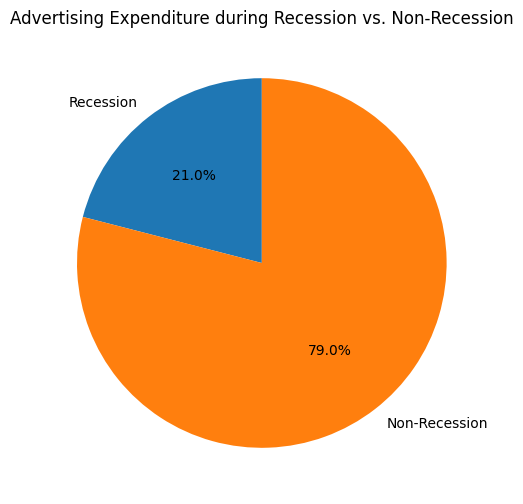

In [36]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession vs. Non-Recession')
plt.show()

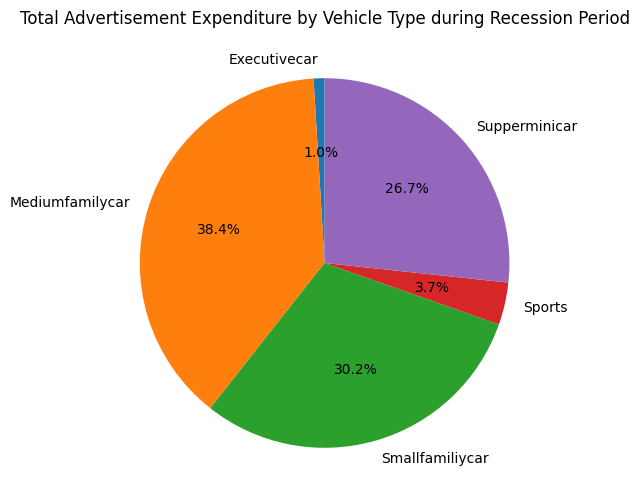

In [38]:
Rdata = df[df['Recession'] == 1]

# Calculate the total advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recession Period')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4080\492320766.py:6: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


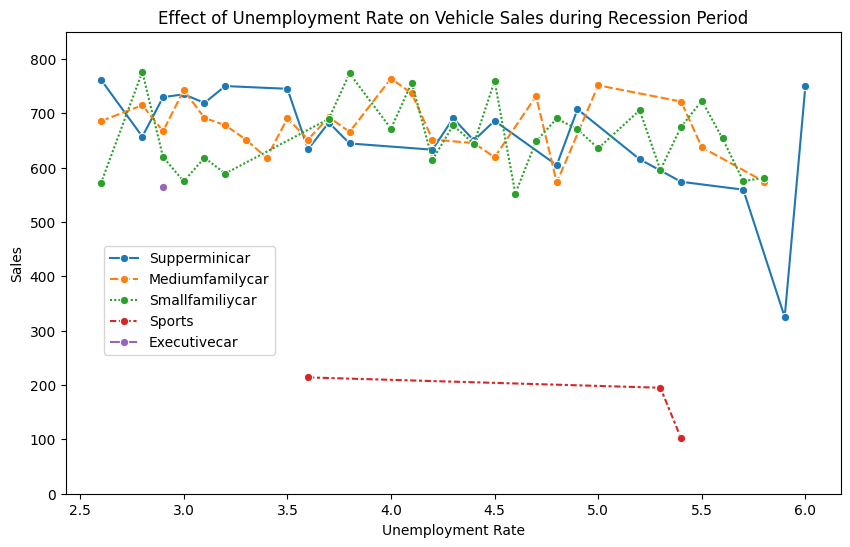

In [43]:
df_rec = df[df['Recession'] == 1]

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

plt.ylim(0, 850)  # Set the y-axis limit as needed
plt.legend(loc=(0.05, 0.3))  # Adjust the legend position

plt.title('Effect of Unemployment Rate on Vehicle Sales during Recession Period')
plt.xlabel('Unemployment Rate')
plt.ylabel('Sales')

plt.show()